### **Import Libraries**

In [1]:
import pandas as pd  #data manipulation
import numpy as np #linear algebra
import seaborn as sns # plots
import matplotlib.pyplot as plt # plots
import warnings #ignore warnings messages

In [2]:
warnings.filterwarnings("ignore")

### **Load Data**

In [3]:
df=pd.read_csv("Car_Evaluation_Balanced.csv")

#### **Split Inputs and Outputs**

In [4]:
def load_inputs_outputs():
    
    X=np.array(df.drop(labels=["class"],axis="columns"))
    y=np.array(df["class"])
    
    return X,y

In [5]:
X,y=load_inputs_outputs()

#### **Split Data**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=42)

In [8]:
X_train.shape[0],X_test.shape[0]

(3242, 1598)

### **Creation of Models**

#### **Decesion Tree**

<img src="https://regenerativetoday.com/wp-content/uploads/2022/04/dt.png">

It is an algorithm that works in a very similar way to the human mind. Formulate a series of questions translated into **mathematical** language as **inequalities**.

It has the advantage that it is easy to interpret. In addition, it does not require a scale adjustment. Because it uses mathematical inequalities, as I mentioned earlier.

In [9]:
from sklearn.tree import DecisionTreeClassifier

#### **Maximum Depth Selection**

We will use the performance metric accuracy. Since it is an easy metric to interpret.

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
def max_depth_ideal():
    
    max_depth_list = []
    acc_train_list = []
    acc_test_list=[]
    
    for max_depth in np.arange(4,20):
        
        tree=DecisionTreeClassifier(max_depth=max_depth,random_state=42)
        tree.fit(X_train,Y_train)
        
        y_pred_train=tree.predict(X_train)
        y_pred_test=tree.predict(X_test)
        
        acc_train=accuracy_score(y_true=Y_train,y_pred=y_pred_train)
        acc_test=accuracy_score(y_true=Y_test,y_pred=y_pred_test)
        
        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)
        max_depth_list.append(max_depth)
        
        
    return max_depth_list,acc_train_list,acc_test_list

In [12]:
max_depth,acc_train,acc_test=max_depth_ideal()

In [13]:
treeEvaluate=pd.DataFrame({"max_depth":max_depth,"acc_train":acc_train,"acc_test":acc_test})

In [14]:
sns.set_style(style="whitegrid")

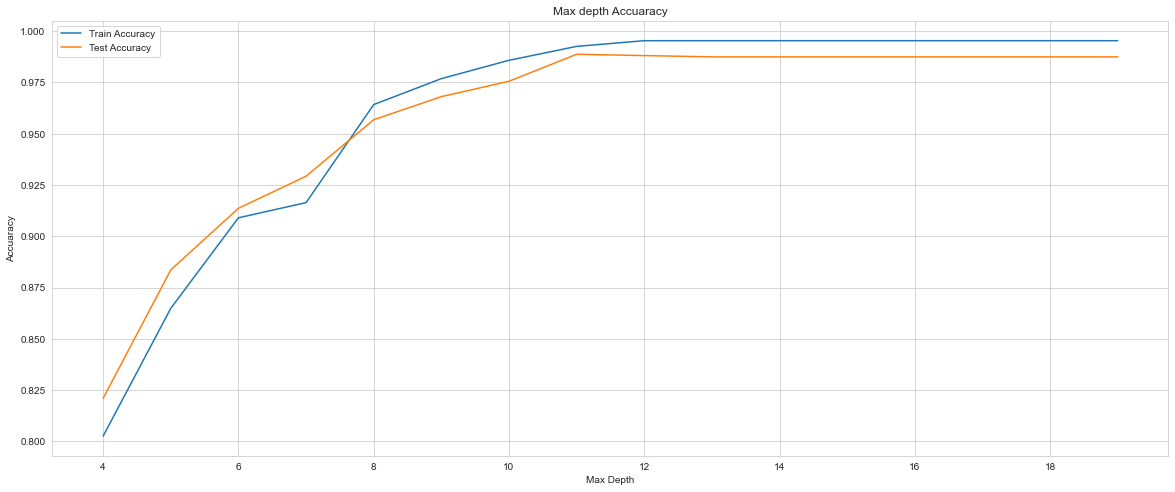

In [15]:
fig,(ax) = plt.subplots(1,1,figsize=(20,8))

ax.set_title("Max depth Accuaracy")
_ = plt.plot(treeEvaluate["max_depth"],treeEvaluate["acc_train"],label="Train Accuracy")
_ = plt.plot(treeEvaluate["max_depth"],treeEvaluate["acc_test"],label="Test Accuracy")

ax.set_xlabel("Max Depth")
ax.set_ylabel("Accuaracy")
ax.legend()

plt.show()

Starting from a maximum depth of 12. There is no noticeable improvement in the accuracy of the test data compared to the training data.

In [16]:
treeEvaluate.query("max_depth>=8 and max_depth<=12")

,max_depth,acc_train,acc_test
4,8,0.964220,0.956821
5,9,0.976866,0.968085
6,10,0.985811,0.975594
7,11,0.992597,0.988736
8,12,0.995373,0.988110


We select a maximum depth for the tree of **10**. Since apart from this amount, there is no longer a significant improvement.And the model does not run into problems of overfitting the training data.

In [17]:
clf_tree=DecisionTreeClassifier(max_depth=10,
                                random_state=42)

##### **Model Parameters**

* **max_depth**: Maximum depth of the tree.
* **random_state**: Random tree state

#### **Random Forest**

<img src="https://st.depositphotos.com/3505477/4895/i/600/depositphotos_48959435-stock-photo-the-illustration-of-cartoon-forest.jpg">

It works very similar to the decision tree.

What can be better than a tree? The very simple answer. a whole forest

Unlike the previous algorithm, here it uses several decision trees. This helps enormously when it comes to avoiding overfitting.

This means that the model is not only good with the training data. The main purpose for creating a model is to predict new data. So it makes sense that the model is good with the test data.

Its prediction system for the classification case is based on a **voting system**. Of all the estimators of the model. If 70 estimators predict that they belong to class A and 30 predict that they belong to class B. The one with the most votes is taken into account.

In [18]:
from sklearn.ensemble import RandomForestClassifier

#### **Ideal Estimator Numbers**

We use as a basis a maximum depth for each estimator of 10.

In [19]:
def estimators_ideal():
    
    n_estimators_list = []
    acc_train_list = []
    acc_test_list=[]
    
    estimators=np.arange(100,300,step=2)

    
    for estimator in estimators:
        
        tree=RandomForestClassifier(max_depth=10,random_state=42,n_estimators=estimator)
        tree.fit(X_train,Y_train)
        
        y_pred_train=tree.predict(X_train)
        y_pred_test=tree.predict(X_test)
        
        acc_train=accuracy_score(y_true=Y_train,y_pred=y_pred_train)
        acc_test=accuracy_score(y_true=Y_test,y_pred=y_pred_test)
        
        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)
        n_estimators_list.append(estimator)
        
        
    return n_estimators_list,acc_train_list,acc_test_list

In [20]:
n_estimators,acc_train,acc_test=estimators_ideal()

In [21]:
rfEvaluate = pd.DataFrame({"n_estimators":n_estimators,"acc_train":acc_train,"acc_test":acc_test})

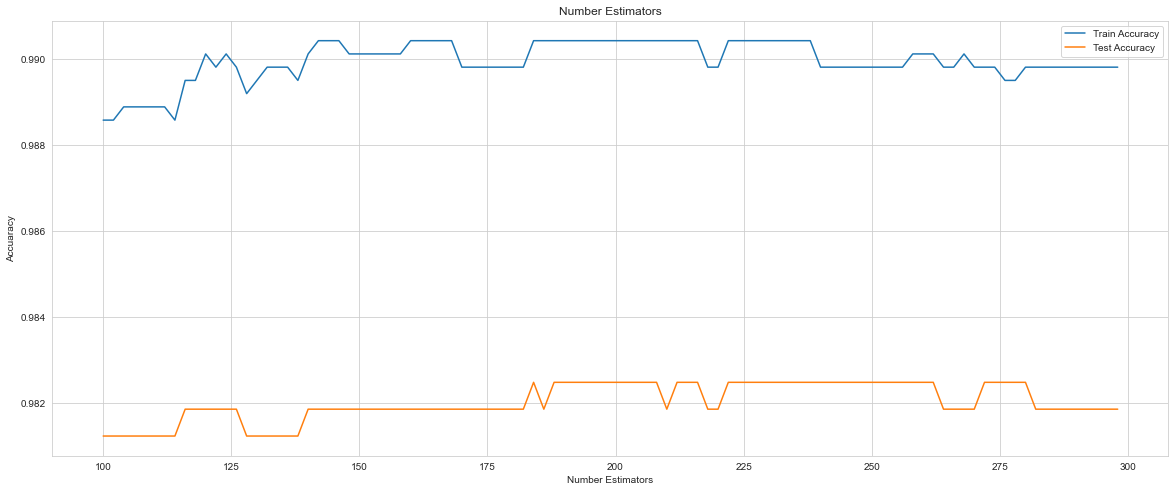

In [22]:
fig,(ax) = plt.subplots(1,1,figsize=(20,8))

ax.set_title("Number Estimators")
_ = plt.plot(rfEvaluate["n_estimators"],rfEvaluate["acc_train"],label="Train Accuracy")
_ = plt.plot(rfEvaluate["n_estimators"],rfEvaluate["acc_test"],label="Test Accuracy")

ax.set_xlabel("Number Estimators")
ax.set_ylabel("Accuaracy")
ax.legend()

plt.show()

There is no significant improvement by increasing the number of estimators. Therefore, **using 100 estimators** as a base is enough to solve the problem.

In [23]:
clf_rf=RandomForestClassifier(max_depth=10,
                              n_estimators=100,
                              n_jobs=-2,
                              random_state=42)

#### **Model Parameters**

Share several in common parameters. Except for a few:

* **n_estimators**: Number of decision trees.
* **n_jobs**: Number of working cores of the cpu.

#### **Support Vector Machine**

<img src="https://miro.medium.com/max/1400/1*qZFPN60NvwbFE_tRg2YPoQ.png">

It consists of finding the best hyperplane that fits the data set. According to the **kernel** provided by the user. It works quite well for relatively small data sets.

It has the disadvantage of requiring a scalar setting for variables. In order to make them comparable to each other. Since these algorithms are very sensitive.

##### **StandarScaler**

Mathematically, it consists of subtracting the average of each of the variables. And finally owe it to the standard deviation.

With this process we achieve that the variables are comparable to each other.

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
def scaler_data():
    
    scaler=StandardScaler()
    scaler.fit(X_train)
    
    X_train_sc=scaler.transform(X_train)
    X_test_sc=scaler.transform(X_test)
    
    return X_train_sc,X_test_sc

In [26]:
X_train_sc,X_test_sc=scaler_data()

In [27]:
from sklearn.svm import SVC

In [28]:
svc_linear=SVC(kernel="linear")
svc_poly=SVC(kernel="poly",degree=3)

#### **Model Parameters**

* **kernel**: SVC core.
* **degree**: Degree of the polynomial.

### **Selection of Model Ideal**

#### **Criteria**


* The model must have **balanced accuracy**. For each case.
* The model must **not only be adapted** to the set of **training** deals.
* The algorithm must have **good performance**. For data **you've never seen**.
* Must have a **high percentage** of **generalization**.

In [29]:
def train_model(model_name):
    
    if model_name == "tree":
        return clf_tree.fit(X_train,Y_train)
    
    if model_name == "rf":
        return clf_rf.fit(X_train,Y_train)
    
    if model_name == "svc_linear":
        return svc_linear.fit(X_train_sc,Y_train)
    
    if model_name == "svc_poly":
        return svc_poly.fit(X_train_sc,Y_train)

In [30]:
for name in ["tree","rf","svc_linear","svc_poly"]:
    
    train_model(model_name=name)

### **Model evaluation**

#### **Clasification Report**

Build a text report showing the main classification metrics. According to the metrics of each class.

#### **Confusion Matrix**

<img src = "https://miro.medium.com/max/667/1*3yGLac6F4mTENnj5dBNvNQ.jpeg">

It provides us in a graphical way. The number of hits and misses for each class.

### **Cross Validation**

<img src = "https://www.researchgate.net/publication/326465007/figure/fig1/AS:649909518757888@1531961912055/Ten-fold-cross-validation-diagram-The-dataset-was-divided-into-ten-parts-and-nine-of.png">

It gives us the average generalization of the model.

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [32]:
class Evaluete():
    
    def __init__(self,model,data):
        
        self.data=data
        self.model=model
        self.y_pred=self.model.predict(self.data)
        
    def Report(self):
        
        print(classification_report(y_true=Y_test,y_pred=self.y_pred,target_names=["unacc","acc","good","vgood"]))
        
    def ConfusionMatixPlot(self):
        
        cm_labels = ["unacc","acc","good","vgood"]
        cm_array = confusion_matrix(y_true=Y_test,y_pred=self.y_pred)
        cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
        
        
        fig,(ax) = plt.subplots(1,1,figsize=(10,8))
        
        ax.set_title("Confusion Matrix")
        _ = sns.heatmap(cm_array_df,annot=True,fmt="g",cmap="Greens")

    def CrossValidation(self):
        
        return cross_val_score(self.model,X_test,Y_test,cv=10).mean()

In [33]:
tree=Evaluete(model=clf_tree,data=X_test)
rf=Evaluete(model=clf_rf,data=X_test)

svcLinear=Evaluete(model=svc_linear,data=X_test_sc)
svcPoly=Evaluete(model=svc_poly,data=X_test_sc)

#### **Decesion Tree**

In [34]:
tree.Report()

              precision    recall  f1-score   support

       unacc       0.98      0.99      0.98       425
         acc       0.97      0.97      0.97       395
        good       0.97      0.99      0.98       381
       vgood       0.98      0.96      0.97       397

    accuracy                           0.98      1598
   macro avg       0.98      0.98      0.98      1598
weighted avg       0.98      0.98      0.98      1598



It shows very well balanced metrics.

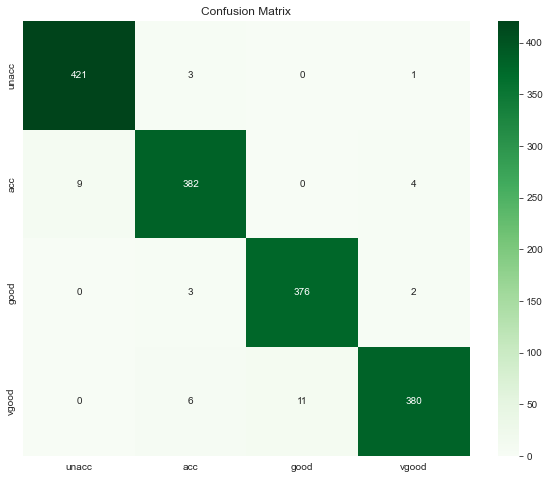

In [35]:
tree.ConfusionMatixPlot()

In [36]:
tree.CrossValidation()

0.9749685534591194

It has a fairly high generalization rate.

#### **Random Forest**

In [37]:
rf.Report()

              precision    recall  f1-score   support

       unacc       1.00      0.97      0.99       425
         acc       0.96      0.96      0.96       395
        good       0.99      0.99      0.99       381
       vgood       0.97      0.99      0.98       397

    accuracy                           0.98      1598
   macro avg       0.98      0.98      0.98      1598
weighted avg       0.98      0.98      0.98      1598



Random Forest apparently have better results. Because it uses more estimators.

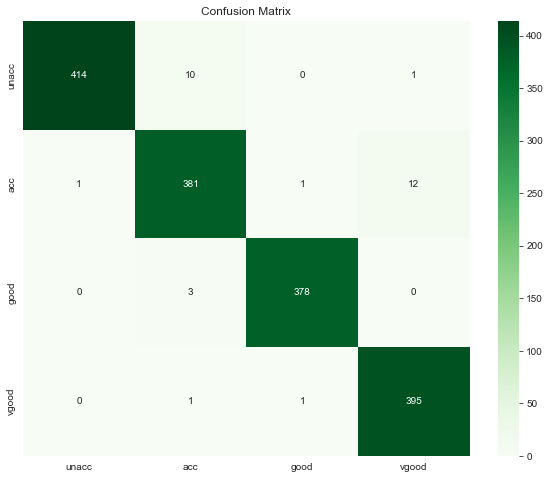

In [38]:
rf.ConfusionMatixPlot()

In [39]:
rf.CrossValidation()

0.9755935534591196

It has an average of generalization similar to the decision tree.

#### **SVM Kernel Linear**

In [40]:
svcLinear.Report()

              precision    recall  f1-score   support

       unacc       0.87      0.85      0.86       425
         acc       0.84      0.75      0.80       395
        good       0.98      0.99      0.99       381
       vgood       0.90      1.00      0.95       397

    accuracy                           0.90      1598
   macro avg       0.90      0.90      0.90      1598
weighted avg       0.90      0.90      0.90      1598



It offers lower metrics than the other models. Since the kernel configures it to separate the data in a **linear** way.

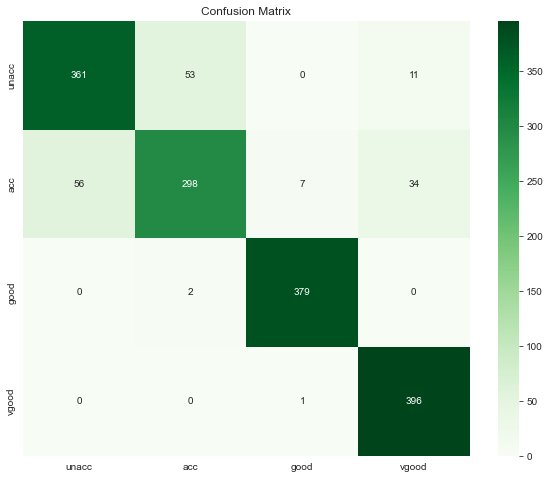

In [41]:
svcLinear.ConfusionMatixPlot()

In [42]:
svcLinear.CrossValidation()

0.8986360062893082

He has a good generation average. But lower than its competitors.

#### **SVM Kernel Polynomial**

In [43]:
svcPoly.Report()

              precision    recall  f1-score   support

       unacc       1.00      0.96      0.98       425
         acc       0.94      0.94      0.94       395
        good       0.99      0.99      0.99       381
       vgood       0.95      0.98      0.97       397

    accuracy                           0.97      1598
   macro avg       0.97      0.97      0.97      1598
weighted avg       0.97      0.97      0.97      1598



It offers good metrics. Since I changed the kernel. To a **polynomial** type of **degree 3**.

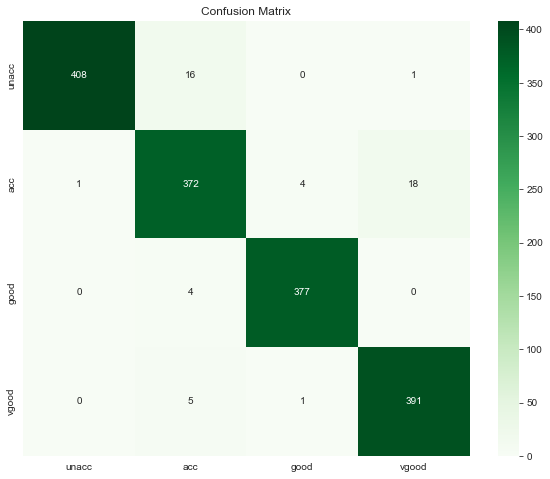

In [44]:
svcPoly.ConfusionMatixPlot()

In [45]:
svcPoly.CrossValidation()

0.9518278301886793

They have a higher generalization rate than an SVC with a linear kernel. But inferior to Random Forest and Decession Tree.

In [46]:
scoreTree=clf_tree.score(X_test,Y_test)
scoreRF= clf_rf.score(X_test,Y_test)

scoreSVCLinear=svc_linear.score(X_test_sc,Y_test)
scoreSVCPoly=svc_poly.score(X_test_sc,Y_test)

In [47]:
modelName= ["Decesion Tree","Random Forest","SVC Linear","SVC Poly"]
modelScore= [scoreTree,scoreRF,scoreSVCLinear,scoreSVCPoly]

In [48]:
dfEvaluate=pd.DataFrame({"Model Name":modelName,"Model Score":modelScore})

In [49]:
dfEvaluate

,Model Name,Model Score
0,Decesion Tree,0.975594
1,Random Forest,0.981227
2,SVC Linear,0.897372
3,SVC Poly,0.968711


### **Selection of the Best Model**

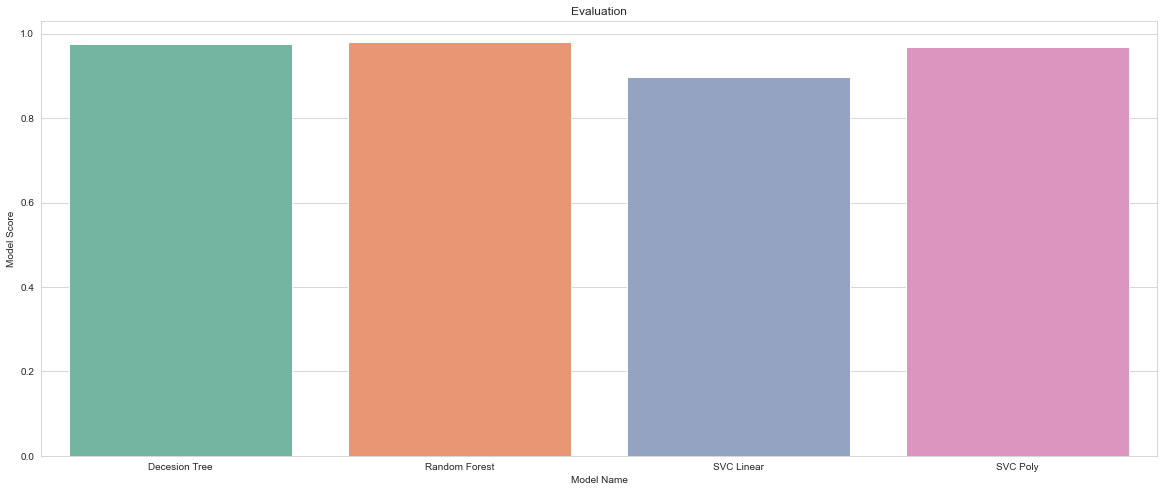

In [50]:
fig,(ax) = plt.subplots(1,1,figsize=(20,8))

ax.set_title("Evaluation")
_ = sns.barplot(data=dfEvaluate,x="Model Name",y="Model Score",palette="Set2",ax=ax)
plt.show()

The Random Forest has better performance than the other algorithms. But sometimes **performance isn't everything**...

#### **Conclusion**

Although the Random Forest gives excellent results, it is computationally more expensive than the decision tree. This one offers almost the same performance. It also has the advantage that it is easier to interpret. This facilitates the final explanation to the client.

SVCs have the disadvantage of requiring data preprocessing. Which gives strange points to the decision tree.